# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_3")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_3-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_3-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_3/network-config.json
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


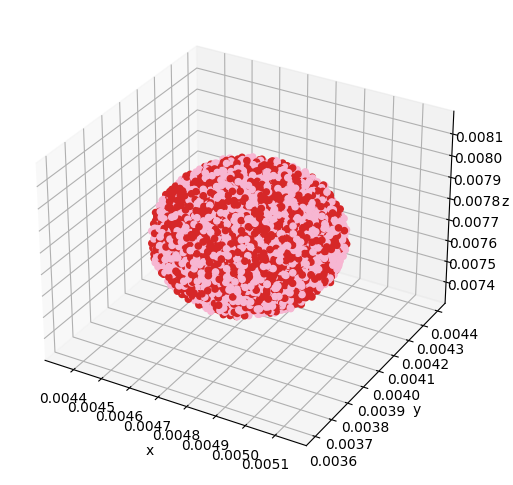

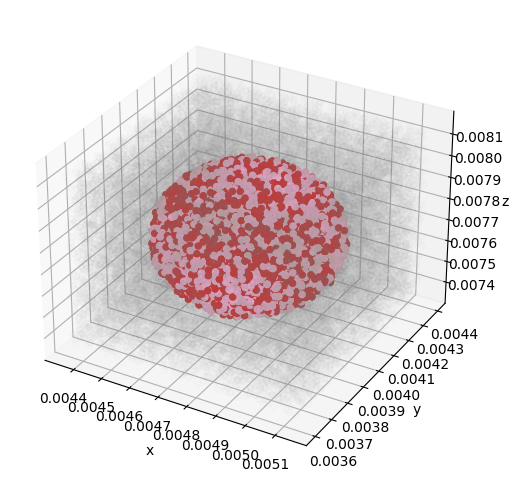

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_3/network-config.json
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


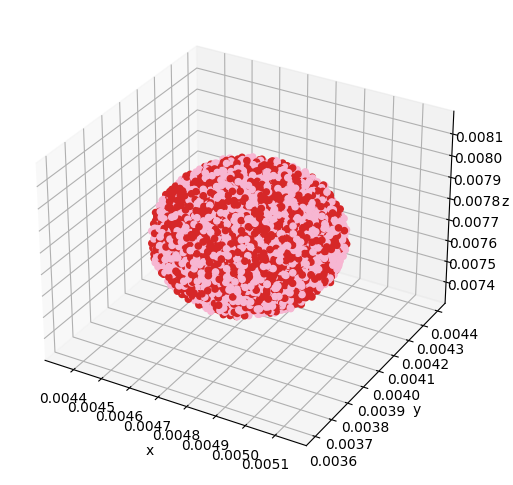

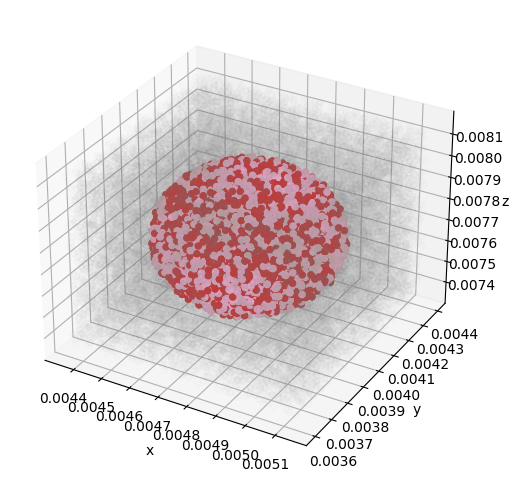

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

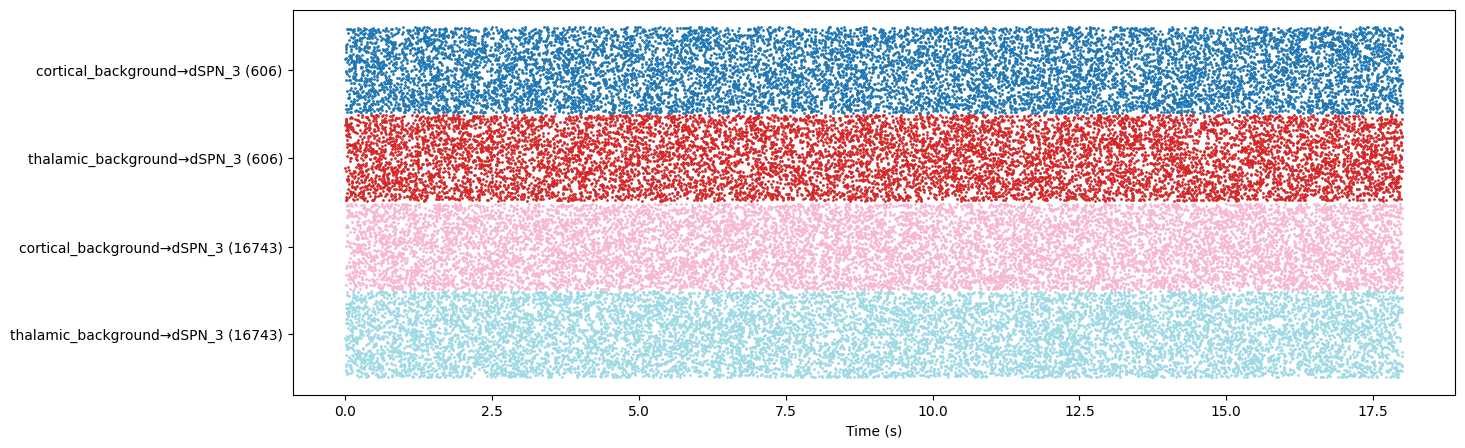

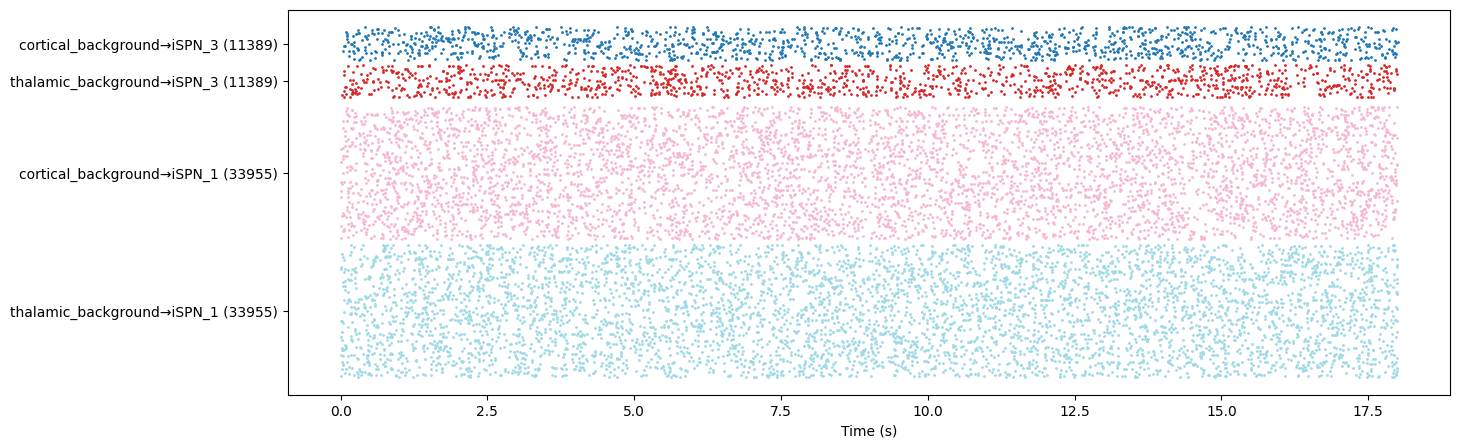

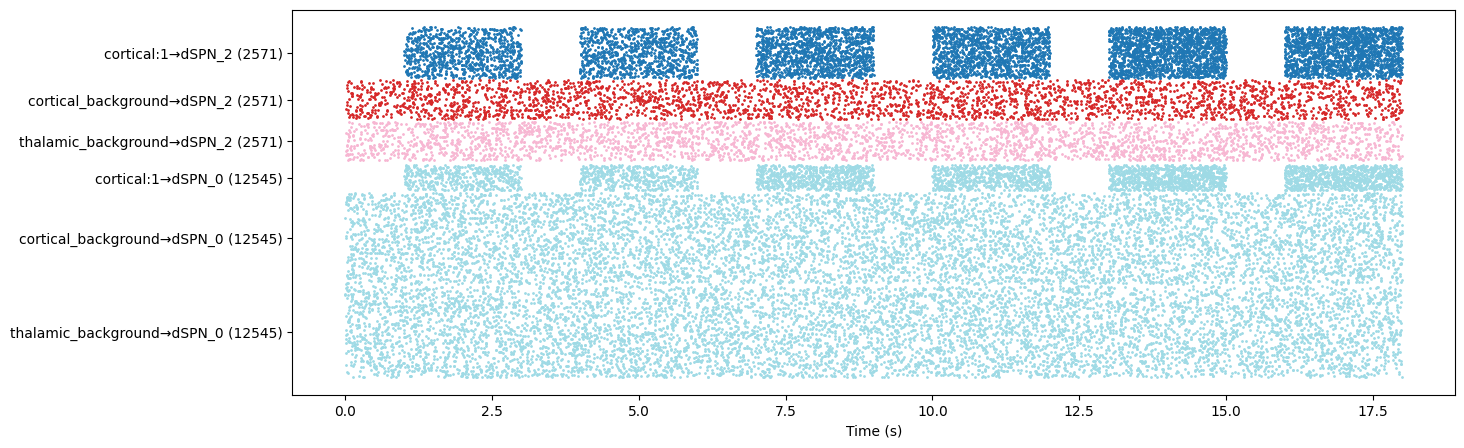

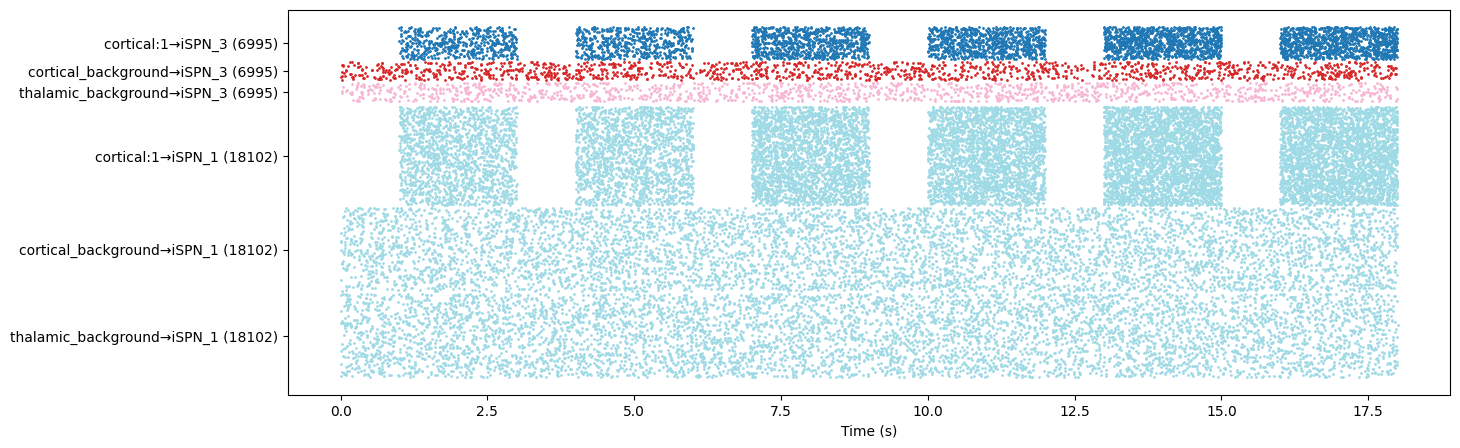

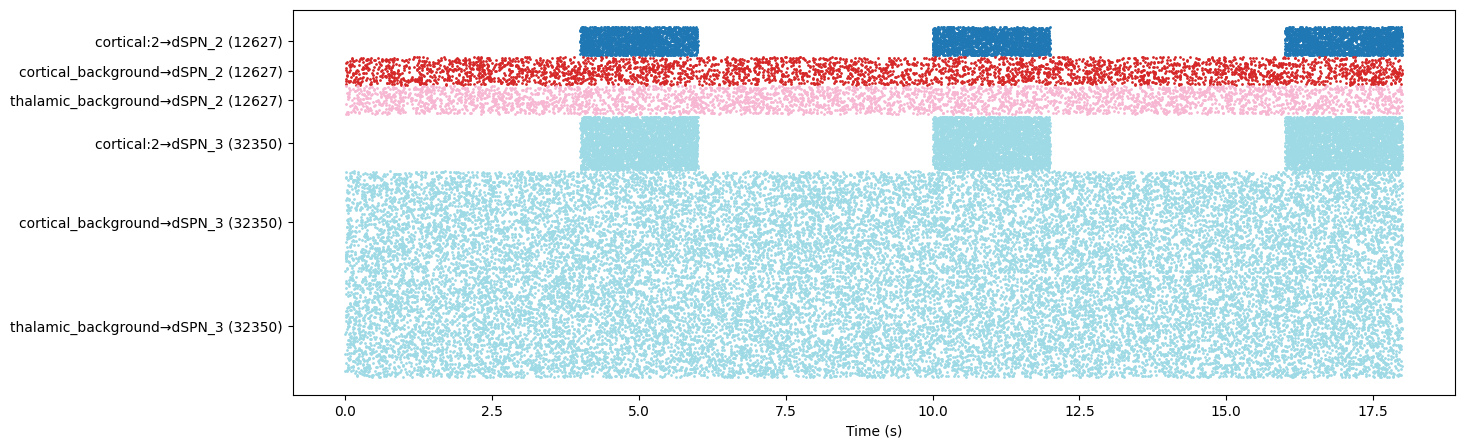

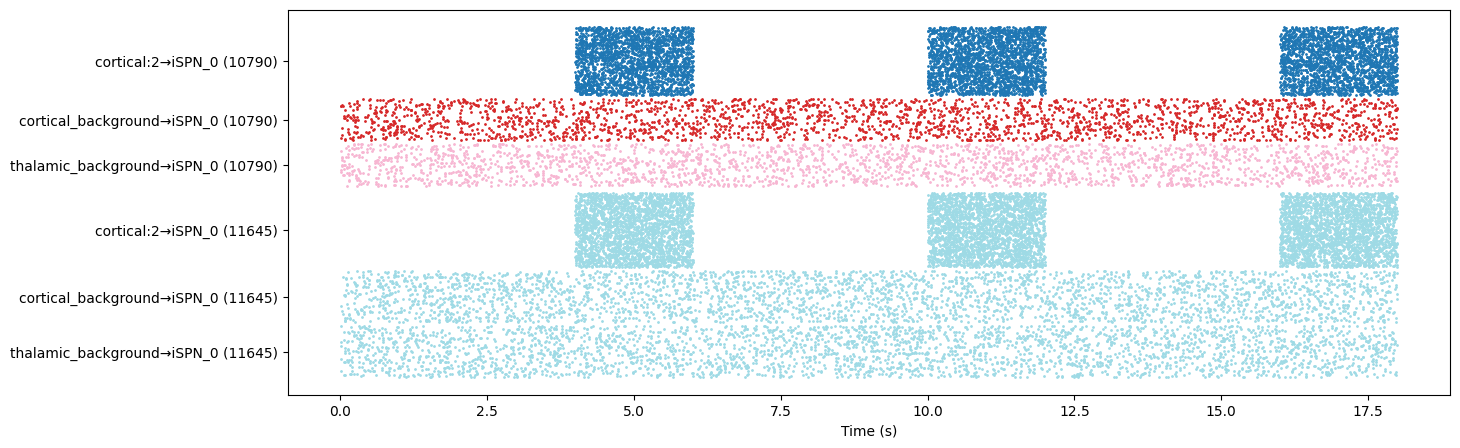

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")

spi = PlotInput(input_file, network_file)

spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_3/simulation/output-with-synapses-sten_3-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
2485: (LTS_1, p72cfe937, m872fbb26)
2503: (dSPN_0, p7aa400d6, m22be6817)
2526: (dSPN_0, p7aa400d6, m9fda9b20)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3578: (dSPN_0, pb0529fb9, m37886c78)
3598: (dSPN_0, pd01ac450, mf702205f)
3599: (dSPN_0, pb0529fb9, mc710c1a4)
3600: (dSPN_0, p1863c9a5, m22be6817)
3602: (dSPN_0, p1863c9a5, m37886c78)
3944: (LTS_1, pb5a5193d, mda52699c)
3963: (dSPN_0, p1863c9a5, m22be6817)
3989: (dSPN_0, p7aa400d6, m22be6817)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, pd2ca4eaf, m803558b5)
5187: (LTS_0, pe9c8b984, m803558b5)
5188: (LTS_0, p1fd33c8c, m803558b5)
5189: (LTS_1, p08df4357, m872fbb26)

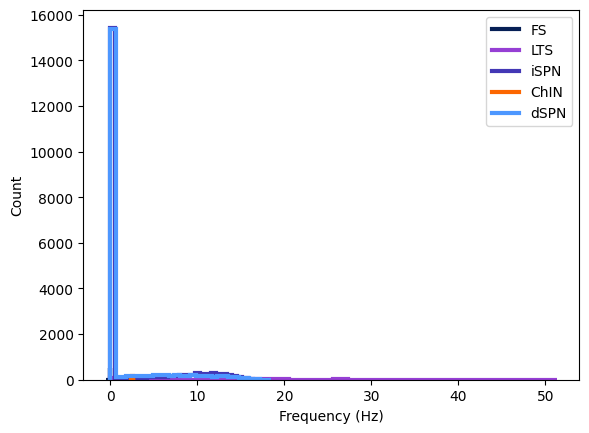

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


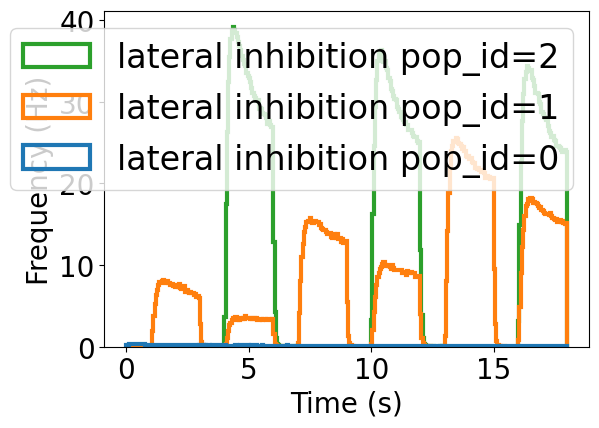

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_3/simulation/output-no-synapses-sten_3-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
2437: (iSPN_3, p57956f10, m1083058d)
2485: (LTS_1, p72cfe937, m872fbb26)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3561: (dSPN_0, pb0529fb9, m9fda9b20)
3592: (dSPN_0, pb0529fb9, mc710c1a4)
3596: (dSPN_0, p1863c9a5, m22be6817)
3599: (dSPN_0, pb0529fb9, mc710c1a4)
3913: (iSPN_3, p57956f10, m541041a7)
3944: (LTS_1, pb5a5193d, mda52699c)
4353: (iSPN_3, p57956f10, m541041a7)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4418: (dSPN_0, pb0529fb9, m22be6817)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, pd2ca4eaf, m803558b5)
5187: (LTS_0, pe9c8b984, m803558b5)
5188: (LTS_0, p1fd33c8c, m803558b5)
5189: (LTS_1, p08df4357, m872fbb26)
5190: (LTS_1, pe2b0b6c2, ma4dacccf)
55

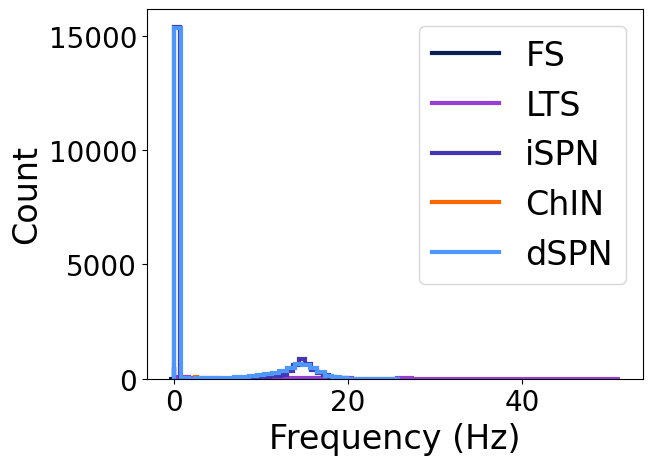

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


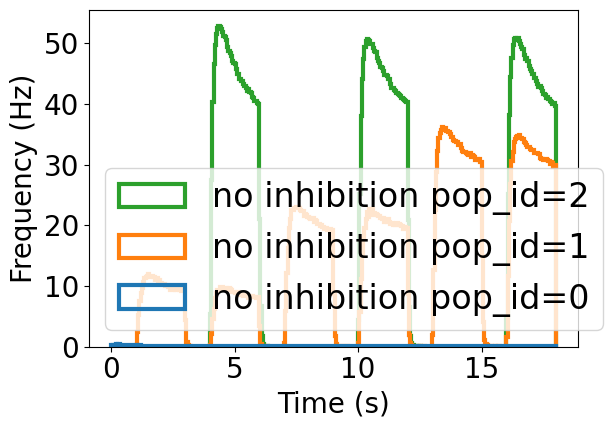

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


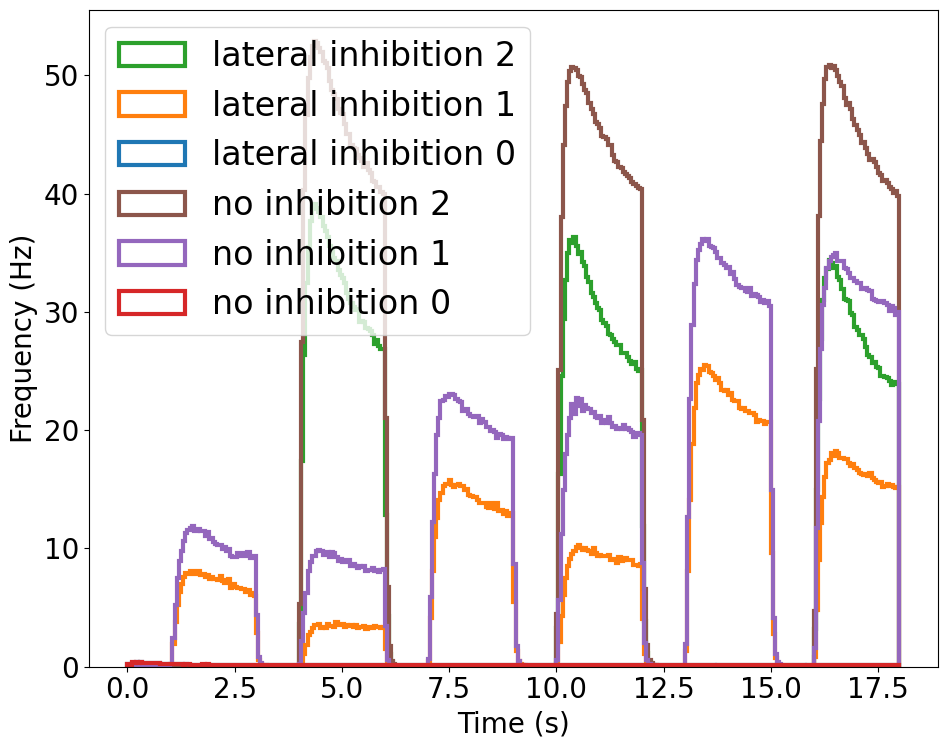

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [14]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_3/network-synapses.hdf5
Loading input info from ../networks/sten_3/input-spikes.hdf5
Loading ../networks/sten_3/simulation/output-with-synapses-sten_3-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
2485: (LTS_1, p72cfe937, m872fbb26)
2503: (dSPN_0, p7aa400d6, m22be6817)
2526: (dSPN_0, p7aa400d6, m9fda9b20)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3578: (dSPN_0, pb0529fb9, m37886c78)
3598: (dSPN_0, pd01ac450, mf702205f)
3599: (dSPN_0, pb0529fb9, mc710c1a4)
3600: (dSPN_0, p1863c9a5, m22be6817)
3602: (dSPN_0, p1863c9a5, m37886c78)
3944: (LTS_1, pb5a5193d, mda52699c)
3963: (dSPN_0, p1863c9a5, m22be6817)
3989: (dSPN_0, p7aa400d6, m22be6817)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, p

In [15]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2025 2049 2085 2170 2182 2241 2359 2395 2495 2496 2498 2502 2507 2513
 2514 2522 2525 2537 2545 2550 2551 2563 2565 2566 2570 2571 2577 2581
 2582 2583]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


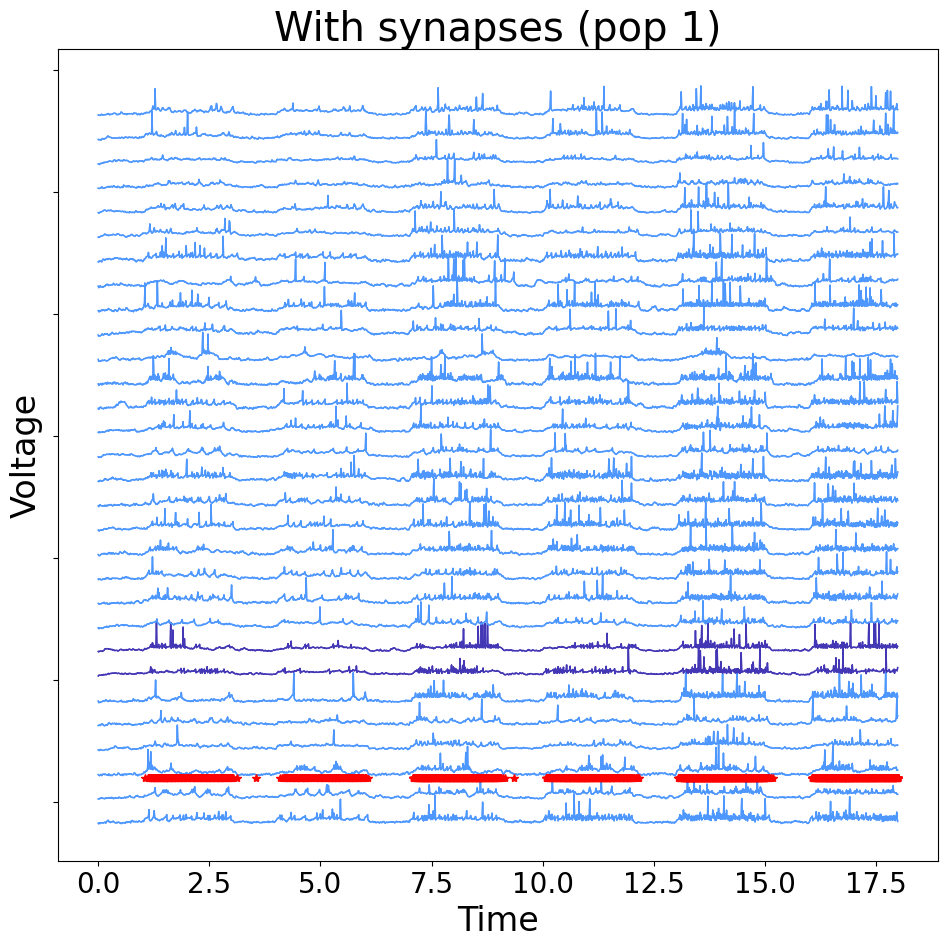

In [16]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [2074 2094 2115 2128 2181 2186 2247 2263 2267 2437 2500 2503 2504 2509
 2512 2520 2521 2526 2527 2532 2544 2549 2552 2554 2555 2564 2568 2573
 2580 2585]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


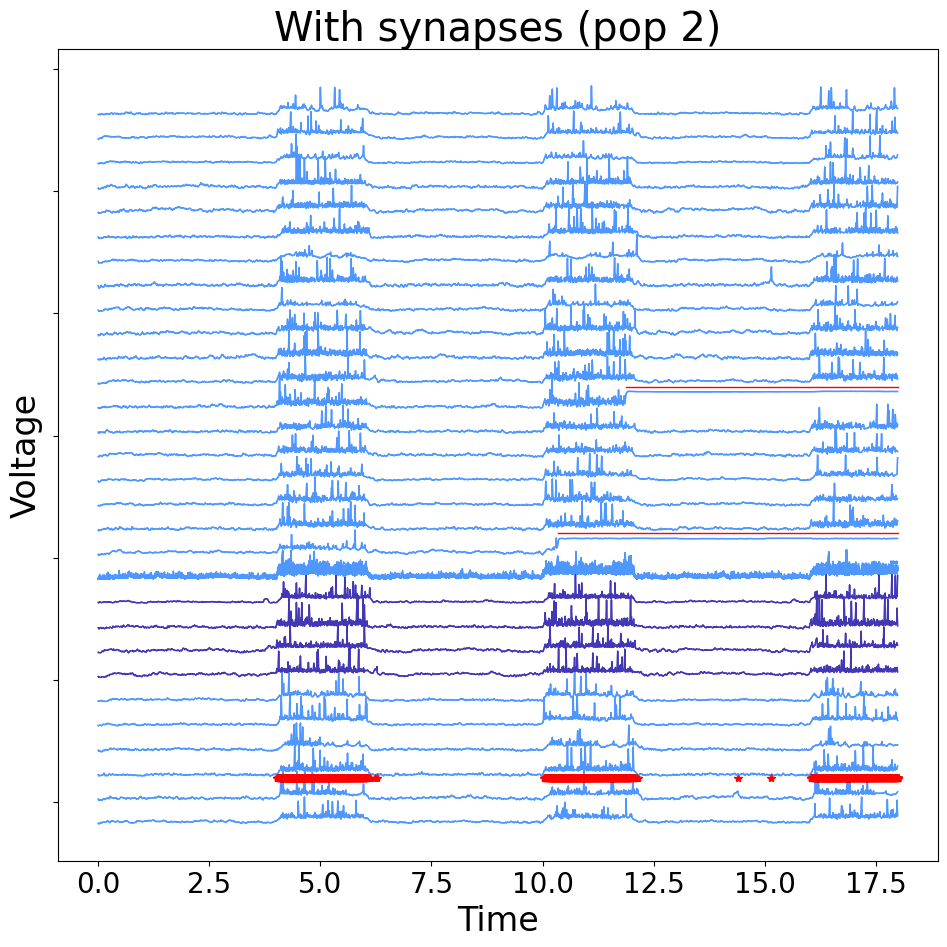

In [17]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [18]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_3/network-synapses.hdf5
Loading input info from ../networks/sten_3/input-spikes.hdf5
Loading ../networks/sten_3/simulation/output-no-synapses-sten_3-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
2437: (iSPN_3, p57956f10, m1083058d)
2485: (LTS_1, p72cfe937, m872fbb26)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3561: (dSPN_0, pb0529fb9, m9fda9b20)
3592: (dSPN_0, pb0529fb9, mc710c1a4)
3596: (dSPN_0, p1863c9a5, m22be6817)
3599: (dSPN_0, pb0529fb9, mc710c1a4)
3913: (iSPN_3, p57956f10, m541041a7)
3944: (LTS_1, pb5a5193d, mda52699c)
4353: (iSPN_3, p57956f10, m541041a7)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4418: (dSPN_0, pb0529fb9, m22be6817)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, pd2ca4eaf, m803558b5)
5187: (LTS_0, pe9c

In [19]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2025 2049 2085 2170 2182 2241 2359 2395 2495 2496 2498 2502 2507 2513
 2514 2522 2525 2537 2545 2550 2551 2563 2565 2566 2570 2571 2577 2581
 2582 2583]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


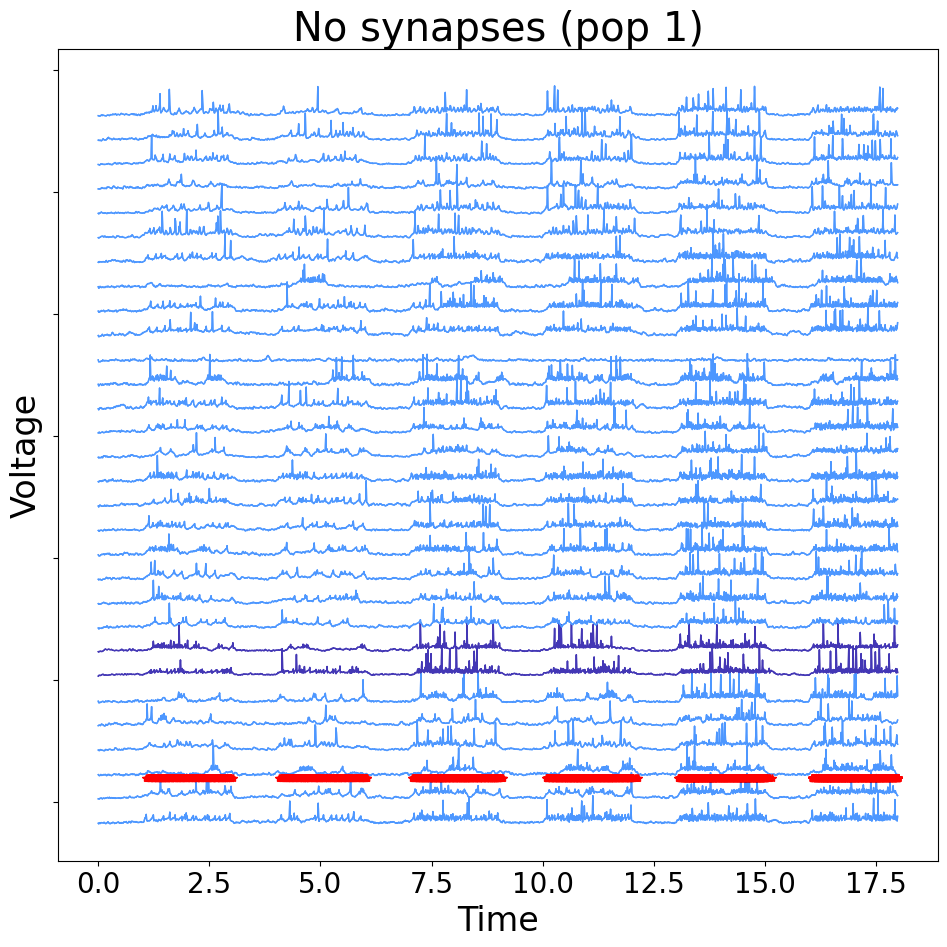

In [20]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [2074 2094 2115 2128 2181 2186 2247 2263 2267 2437 2500 2503 2504 2509
 2512 2520 2521 2526 2527 2532 2544 2549 2552 2554 2555 2564 2568 2573
 2580 2585]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


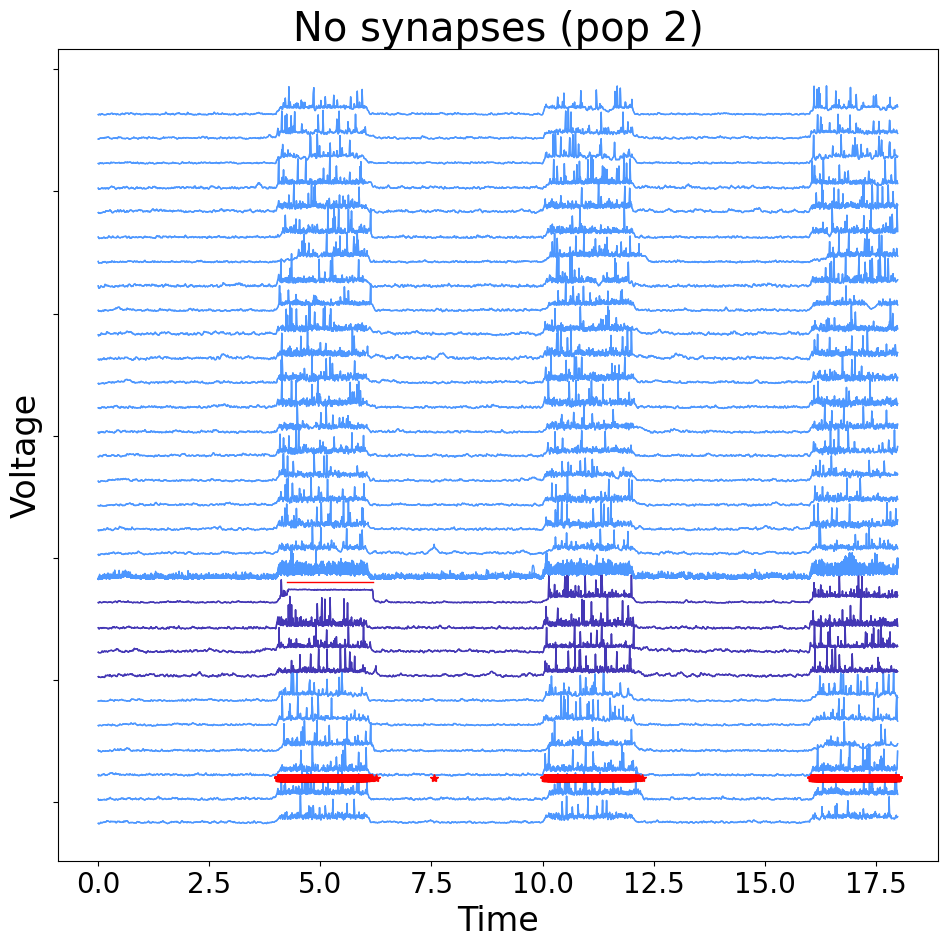

In [21]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [22]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 3578  3602  3989  5217  6373  6384  6388  8552  8555  8559  9208  9221
  9229 11045 11450 11779 11822 12494 12524 12536 12941 14219 15056 15057
 15096 16013 16039 16056 16075 19438 19742 19762 19779 19780 19782 22219
 22223 23999 24006 24996 25341 28477 30723 30733 30764 33021]
Plotted 46 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--dSPN-traces.pdf


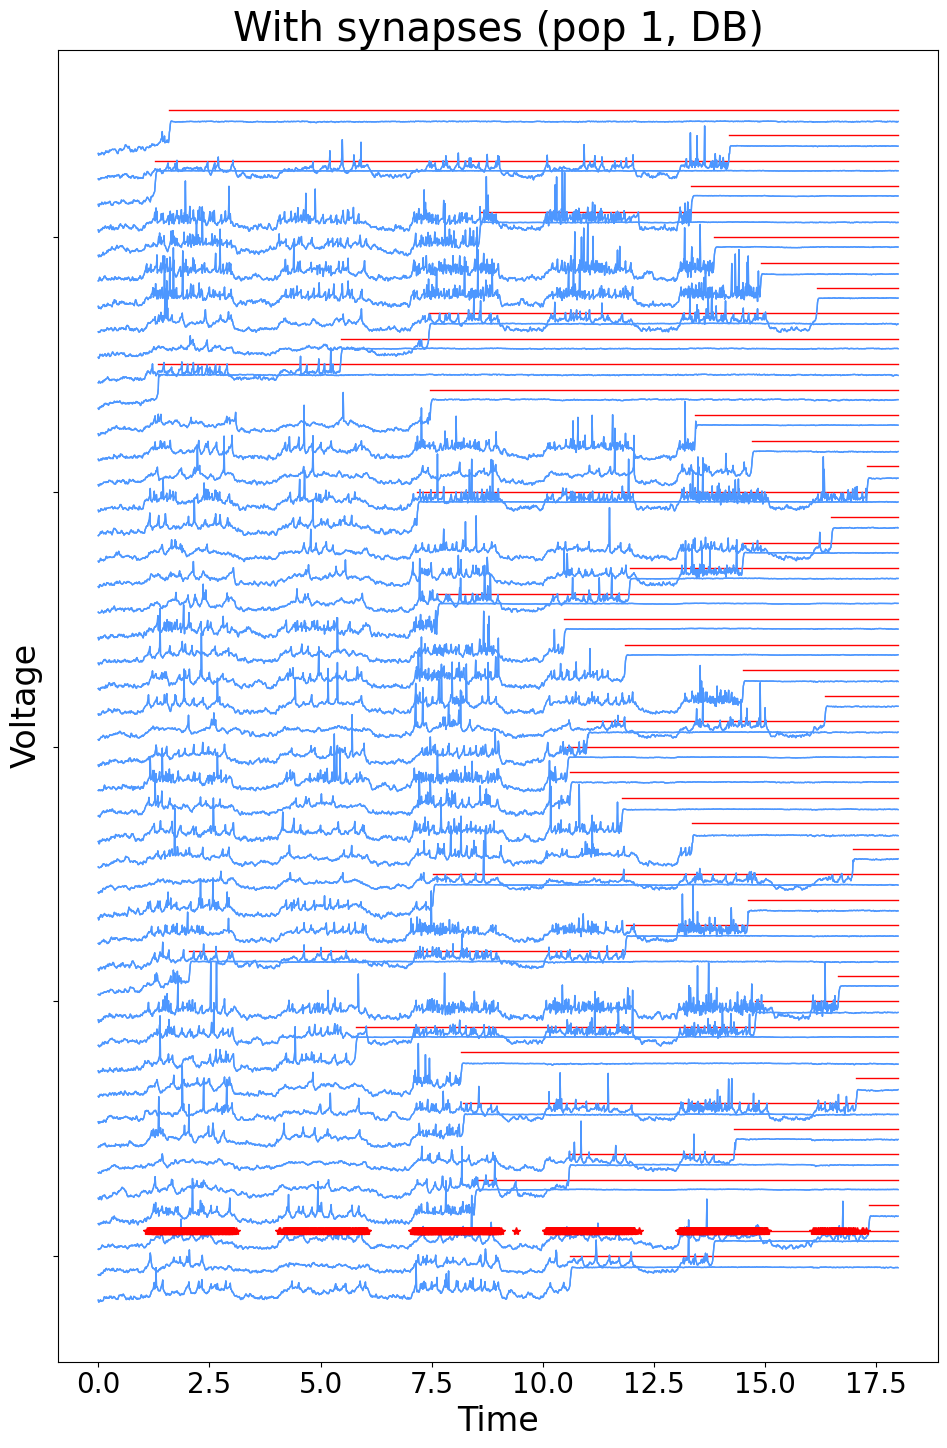

In [23]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 2503  2526  3598  3599  3600  3963  6362  6374  6375  6380  6386  6779
  8053  8562  9198  9220 11448 11457 11471 11786 11810 11827 12514 12523
 12540 13903 13905 15098 17761 19460 19472 19749 19754 20698 22207 22233
 25348]
Plotted 37 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--dSPN-traces.pdf


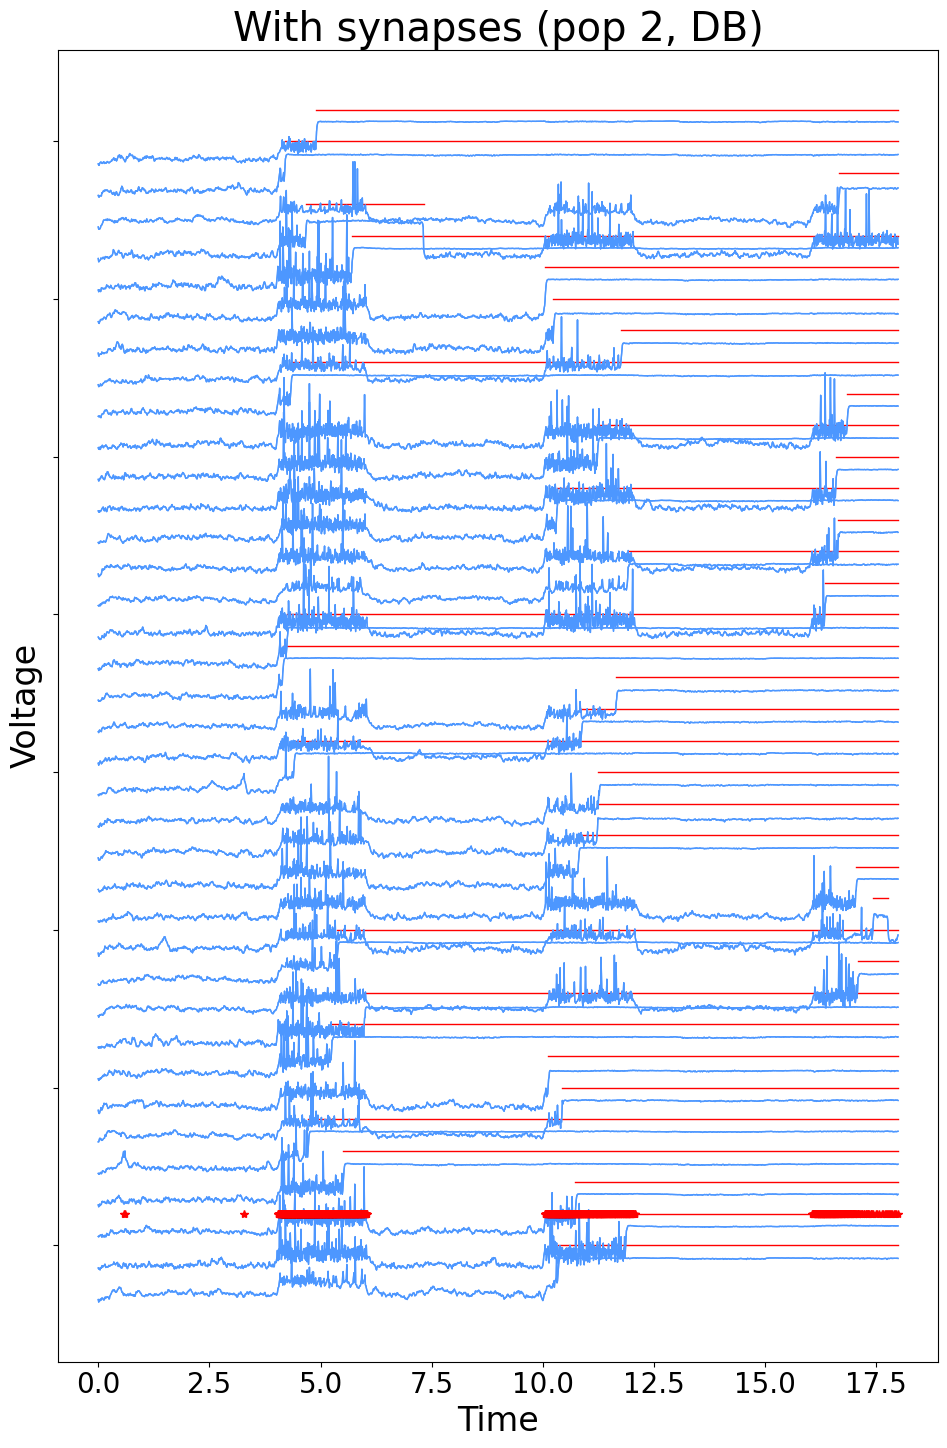

In [24]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 3596  8081  8549  9183  9581 11878 12536 12927 12935 13256 14224 15077
 16922 17765 19462 22222 22319 24439 27856 28513 29399 29409 31196]
Plotted 23 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


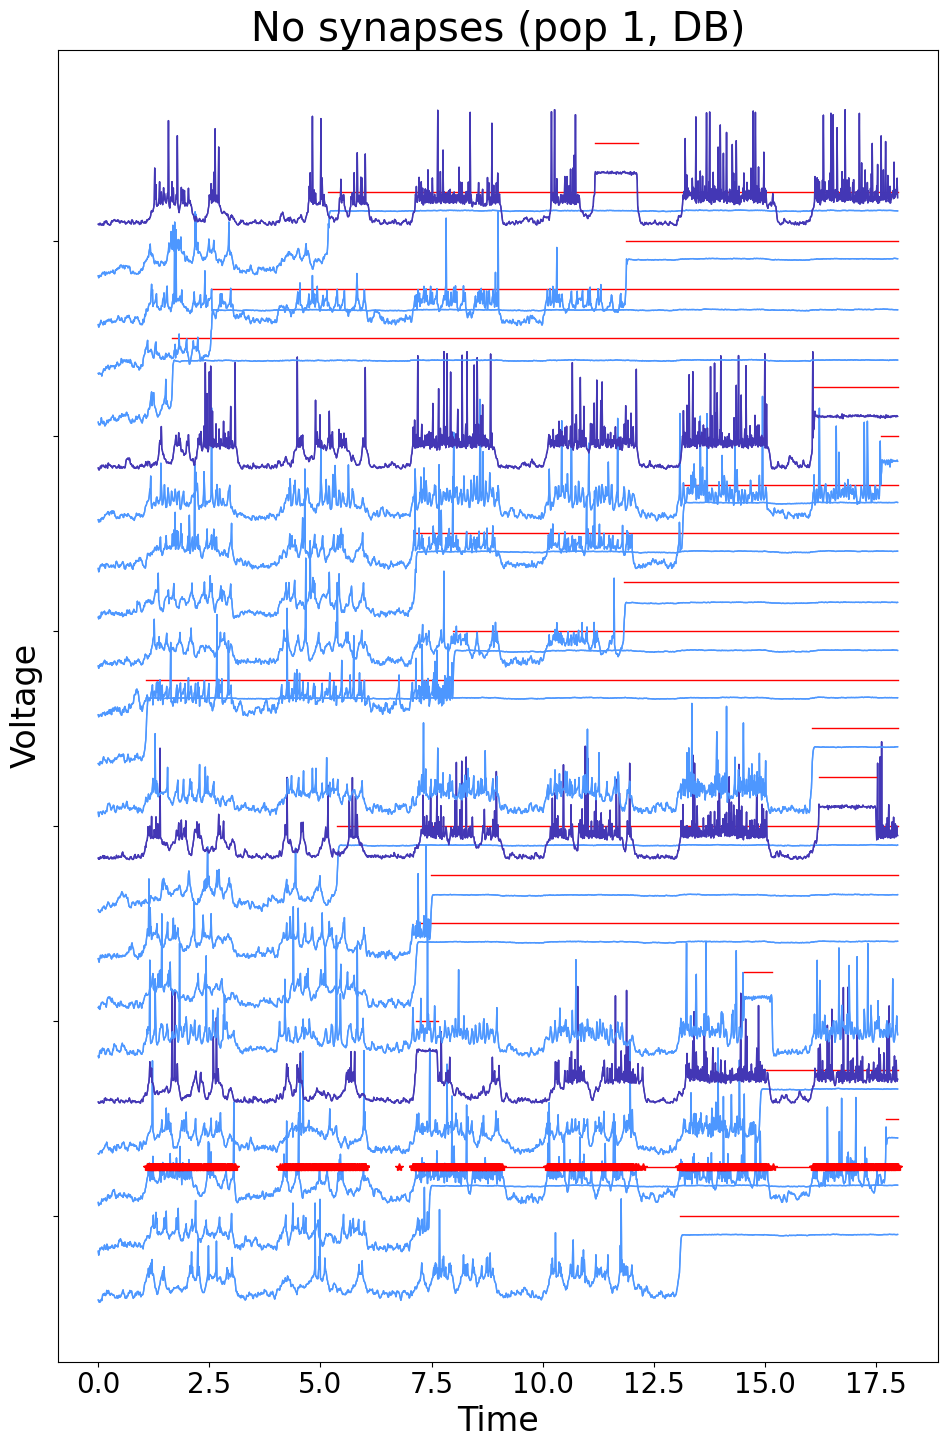

In [25]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 2437  3561  3592  3599  3913  4353  4418  6825  9210  9269  9319 11734
 11786 12075 13260 14610 16948 17802 22226 25947 27612 28470 29400]
Plotted 23 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


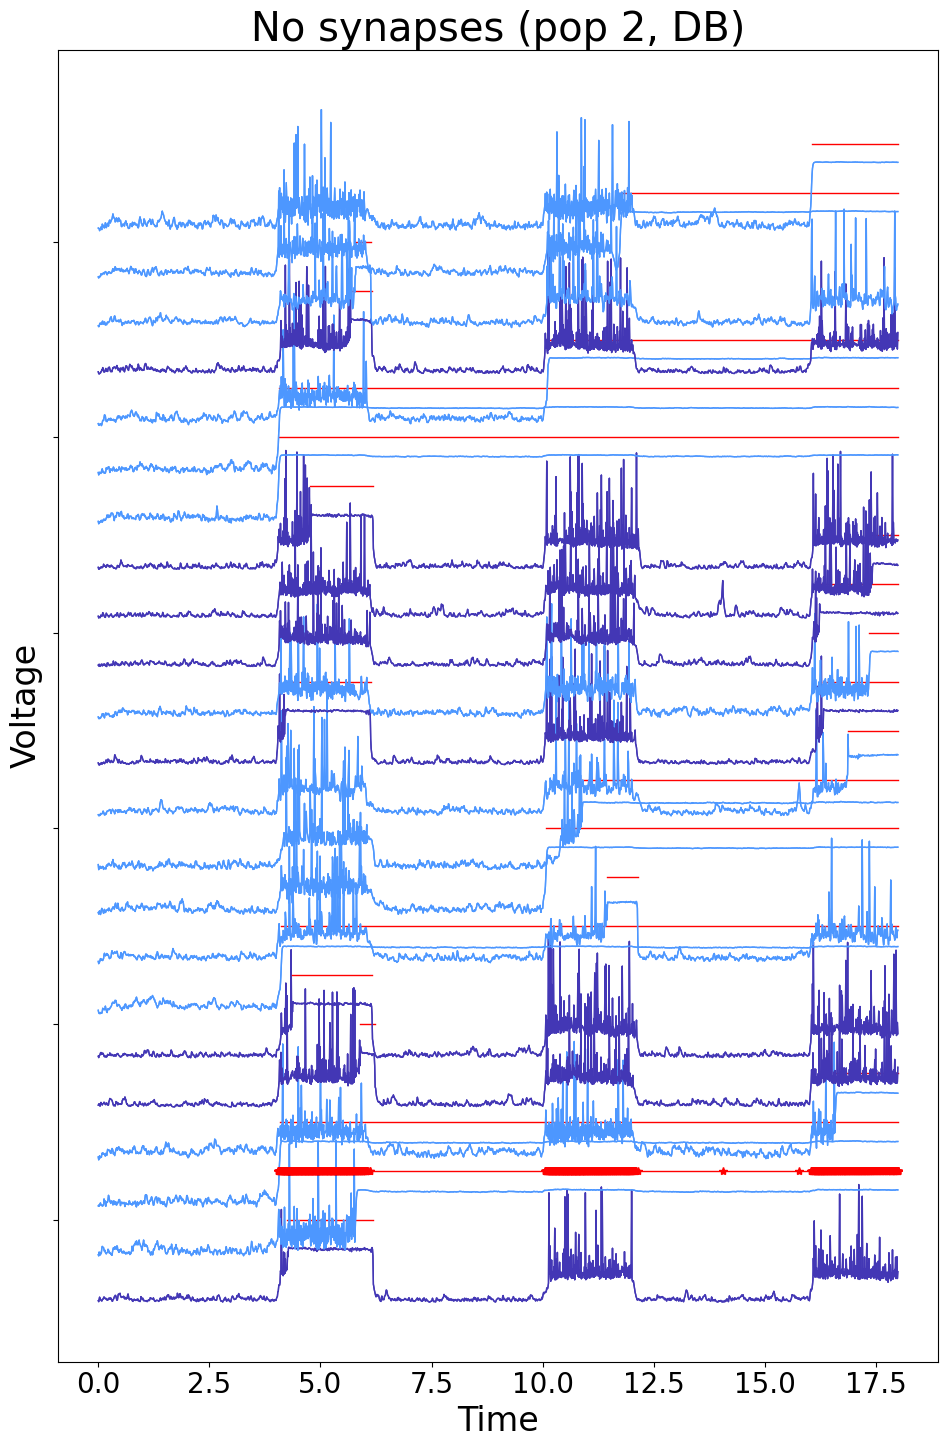

In [26]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)